<a href="https://colab.research.google.com/github/venkeeg/Python-codes/blob/master/cipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Amount Prediction Task**

This .ipynb notebook contains the solution to the loan amount prediction problem statement of Cipla Data Scientist hiring challenge. I have explained the data exploration, visualization, feature selection, model training and final prediction on the test data in successive code sections.

[Link to the problem statement on hackerearth ](https://assessment.hackerearth.com/challenges/hiring/cipla-data-scientist-hiring-challenge/problems/1977bbc6fb0f49019f4091b8d277bb3f/)

**Data exploration and Imputing missing values**


---


In this section I have explored the training data set provided for loan amount prediction. For this, the training file was read into a Pandas DataFrame. As a  part of the process the data set was checked for missing values and spurious values in all the features.

The following was observed.


*   The target variable which in this case is **Loan Sanction 
Amount (USD)**, had a value of -999 in hundereds of samples. I dropped these samples from the training file since replacing them with zeroes could be a wrong assumption and would lead to inconsistency in predicted values as this is the variable to be predicted.

*   The same value of -999 was observed in hundereds of rows in the **Current Loan Expenses** column. I have replaced these values with zero for all the respective rows.

*   The feature **Property Location** had missing values for hundereds of samples. I have replaced these missing values by the alphabet "U" which might be useful later while treating this feature as a categorical one.

*   The same was observed for **Has Active Credit Card** feature, and the same approach was used to replace missing values.

*   **Co-Applicant** feature had multiple rows with value -999 and I replaced them with zero for all the respective rows. **Dependents** column had hundereds of missing values which were replaced with zero.

*   Other features that had multiple samples with missing values were **Gender, Income (USD), Income Stability, Type of Employment, Credit Score, Property Age.** The approach to impute missing values in some of these features was decided after futher data exploration and observing trends and correlation with the target variable.


* Credit Score and Loan Sanction Amount

  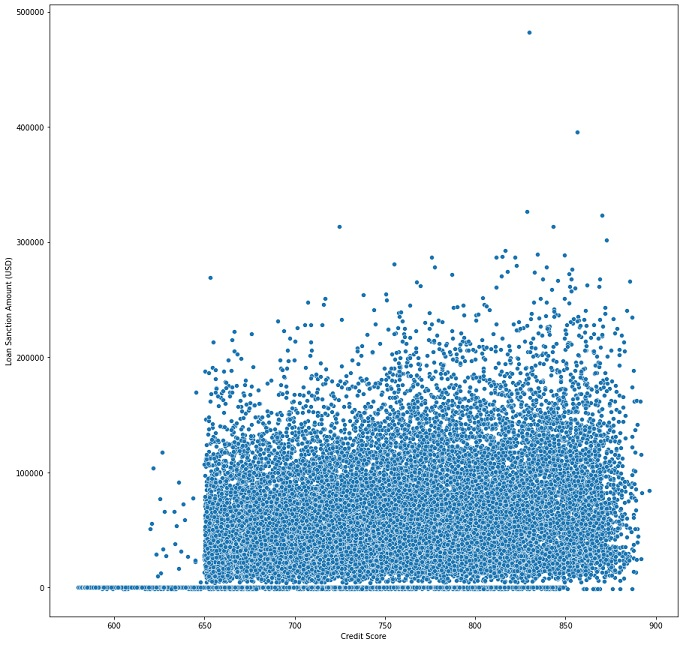

*  The above plot between Credit score and Loan Sanction amount shows a clear trend where Loan is sanctioned only for credit score above a certain threshold. It is therefore important to impute missing values for this feature.

*   From the traning file it was observed that the feature **Income Stability** had value "High" where the **Profession** was "Pensioner" and was "Low" for all other professions. Using this logic I imputed values for the **Income Stability** feature which can be seen in the code section below.

* Now to impute missing values for **Credit Score** feature,I calculated the mean of  Credit Score of all samples where the **Income Stability** was "Low" and used that value to impute. Similarly the mean of Credit score values from samples whose **Income Stability** was "High" was used for imputation. The same can be observed in the code section below. 

* Property Price and Loan Sanction Amount

* 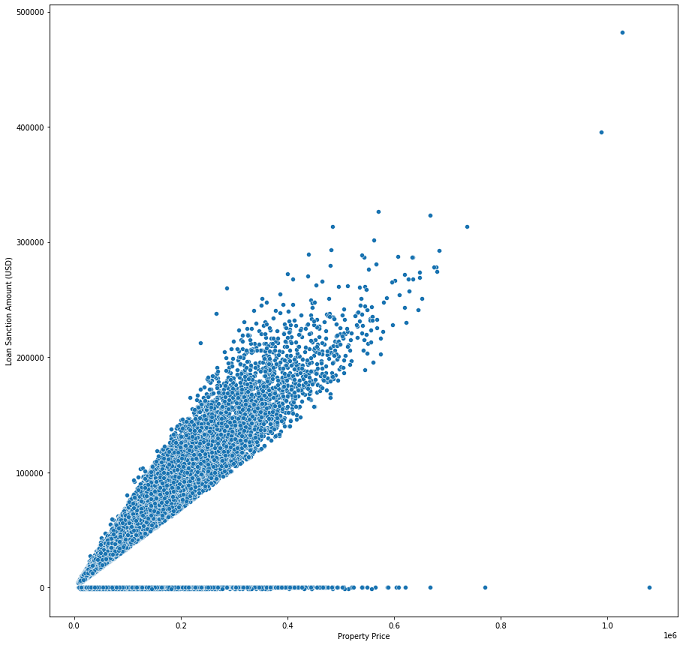

* The above plot between Property Price and Loan Sanction Amount shows a clear linear relation. Hence imputing spurious values for this feature with appropriate values is necessary.

* The feature **Property Price** had a value of -999 in hundereds of samples. To impute values for these samples,I took the following approach. I fetched samples whose **Property Location** was "Urban", "Semi-Urban", "Rural" and calculated the mean of the Property Price for each of these categories. I then used these values to impute values for those samples that had -999 as values corresponding to the 3 different property locations.

* Also, from the training file I observed that there were a few samples where the **entire loan amount requested was sanctioned**. These are extremely rare cases and I treated them as outliers and excluded them from the training samples.





In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")

print("Missing values / NaN values in the Data set")
print()
print(df.isnull().sum())
print("Initial shape of the training file",df.shape)

#Since the Dependent variable has hundered of rows with value = -999, dropping those
#particular rows from the data frame
df['Loan Sanction Amount (USD)'].replace(to_replace=-999,value=np.nan,inplace=True)
idx = df[df['Loan Sanction Amount (USD)'].isnull()].index
df.drop(index=idx,inplace=True)

#Replacing column values of Current Loan expenses for -999 and NaN
df['Current Loan Expenses (USD)'].replace(to_replace=-999,value=0,inplace=True)
df['Current Loan Expenses (USD)'].replace(to_replace=np.nan,value=0,inplace=True)

#Replacing NaN for Property Location with U (unknown)
df['Property Location'].replace(np.nan,'U',inplace=True)

#Replacing NaN for Has Active Credit Card with U (unknown)
df['Has Active Credit Card'].replace(np.nan,'U',inplace=True)

#Replacing -999 for co-applicant with 0
df['Co-Applicant'].replace(to_replace=-999,value=0,inplace=True)

#Replacing NaN for Dependents column with 0
df['Dependents'].replace(np.nan,0,inplace=True)

#Imputing values for Income Stability
#As per observation from training data file, Income stability is "High" for Pensioners, rest
#all are marked as low

df_highinc = df[(df['Income Stability'].isna()) & (df['Profession']=='Pensioner')].copy()
df_highinc['Income Stability'] ='High'

df_lowinc = df[(df['Income Stability'].isna()) & (df['Profession']!='Pensioner')].copy()
df_lowinc['Income Stability'] = 'Low'

#Update missing Income stability values using corresponding indices
df.update(df_highinc)
df.update(df_lowinc)

#Handling credit score
#Mean of credit score among high income stability
mean_inc_hi = df[df['Income Stability']=='High'].copy()
mean_cred_hi = round(mean_inc_hi['Credit Score'].mean(),2)

#Mean of credit score among low income stability
mean_inc_lo = df[df['Income Stability']=='Low'].copy()
mean_cred_lo = round(mean_inc_lo['Credit Score'].mean(),2)

#Imputing values for Credit Score based on Income Stability
df_credhi = df[(df['Income Stability']=='High')& (df['Credit Score'].isna())].copy()
df_credhi['Credit Score'] = mean_cred_hi

df_credlo = df[(df['Income Stability']=='Low') & (df['Credit Score'].isna())].copy()
df_credlo['Credit Score'] = mean_cred_lo

df.update(df_credhi)
df.update(df_credlo)

#Imputing values for Property Price based on Property Location.
#Rural
mean_pprice = df[df['Property Location']=='Rural'].copy()
mean_pprice_ru = round(mean_pprice['Property Price'].mean(),2)
#print(mean_pprice_ru)

#Urban
mean_pprice = df[df['Property Location']=='Urban'].copy()
mean_pprice_ur = round(mean_pprice['Property Price'].mean(),2)
#print(mean_pprice_ur)

#Semi-Urban
mean_pprice = df[df['Property Location']=='Semi-Urban'].copy()
mean_pprice_sem = round(mean_pprice['Property Price'].mean(),2)
#print(mean_pprice_sem)

#Fetching rows where Property Price = -999 for Rural,Urban and Semi Urban
df_pprice = df[(df['Property Price']==-999) & (df['Property Location']=='Rural')].copy()
df_pprice['Property Price'] = mean_pprice_ru
df.update(df_pprice)

df_pprice = df[(df['Property Price']==-999) & (df['Property Location']=='Urban')].copy()
df_pprice['Property Price'] = mean_pprice_ur
df.update(df_pprice)

df_pprice = df[(df['Property Price']==-999) & (df['Property Location']=='Semi-Urban')].copy()
df_pprice['Property Price'] = mean_pprice_sem
df.update(df_pprice)


#Drop rows containing Businessman as profession since test file does not contain this category
#Even the training file has only 2 records for this category of profession
idx = df[df['Profession']=='Businessman'].index
df.drop(index=idx,inplace=True)

#Drop rows where the percentage of  Loan Sanction Amount  as a part of Loan Amount Requested 
#is equal to 100%. These are extremely rare cases and can be treated as outliers.
idx = df[(df['Loan Sanction Amount (USD)']/df['Loan Amount Request (USD)']*100)==100].index
df.drop(index=idx,inplace=True)

print()
print()
print()
#Dataset after imputing missing values and exclusion of some records
print("Dataset after imputing missing values and exclusion of some records")
print()
print(df.isnull().sum())
print("Shape of the new training file",df.shape)


Missing values / NaN values in the Data set

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64
Initial shape of the training file (30000, 24)



Dataset after imputing missi

**Feature selection, Model building and training**


---


In this section, I have further examined the dataframe containing the data from the previous section and analysis such as correlation mapping with the target variable is performed.This helps in selecting the appropriate features which help predict the target variable i.e the Loan Sanction Amount. 

To begin with, I identified the categorical features from the training data set to encode them so that the algorithms can handle them in the subsequent steps. These include features like **Income Stability, Location, Expense Type, Property Type, Co-Applicant** etc. After this I plotted a correlation map to see which are the features that are more correlated to the target variable that needs to be predicted. 


**Correlation Map** (Right click on the below image and open in new tab to zoom)

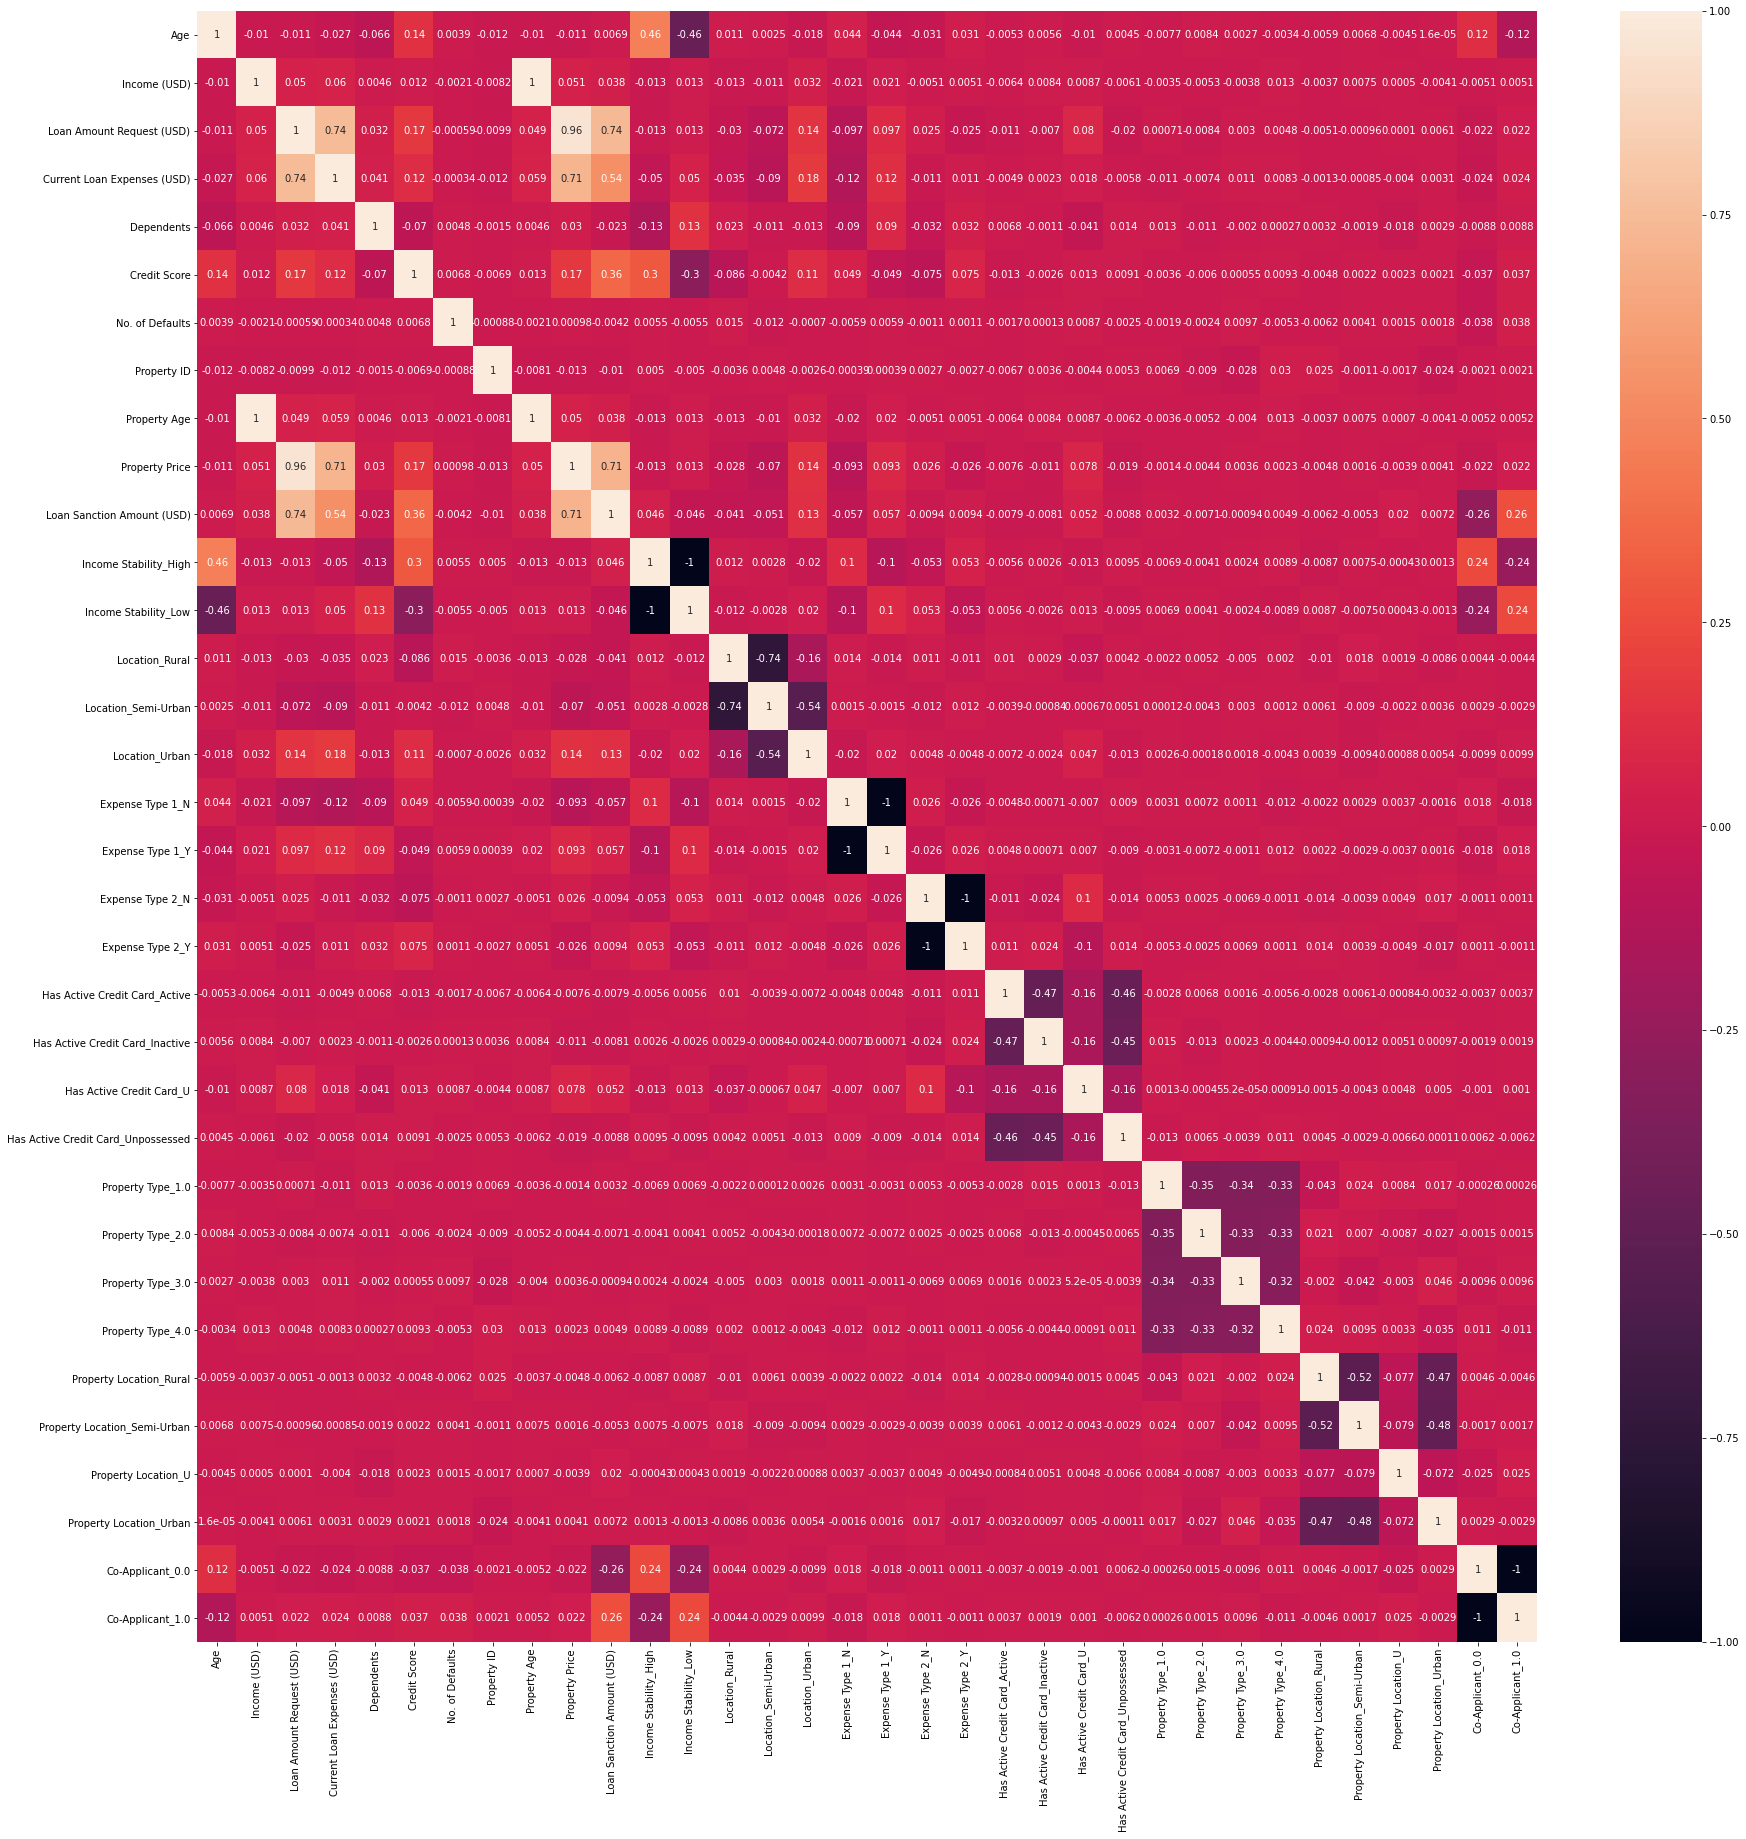



From the above correlation map, it can be seen that features **Current Loan Expenses (USD), Loan Amount Request (USD), Credit Score, Property Price, Location_Urban** etc. have sufficiently high positive correlation with **Loan Sanction Amount (USD)**. Features like **Income (USD), Gender, Age, Property ID,** etc have very minute or no correlation with the target variable. So I have removed these features from the dataframe. Feature **Type of Employment** was dropped as it contained very high number of missing values.

**Model selection**

After copying the target variable into another DataFrame "y" and predictor variables in "X", I tried fitting the training data to different Machine Learning models for Regression from **scikit-learn** library. While doing so one obvious thing was that if I use a LinearRegression, because of the different scales of the predictor variables the coefficients would get very high magnitudes. Another important thing I could note was when I visualized **Loan Amount Request vs Loan Sanction Amount**.

**Loan Amount Request (USD) and Loan Sanction Amount (USD)**

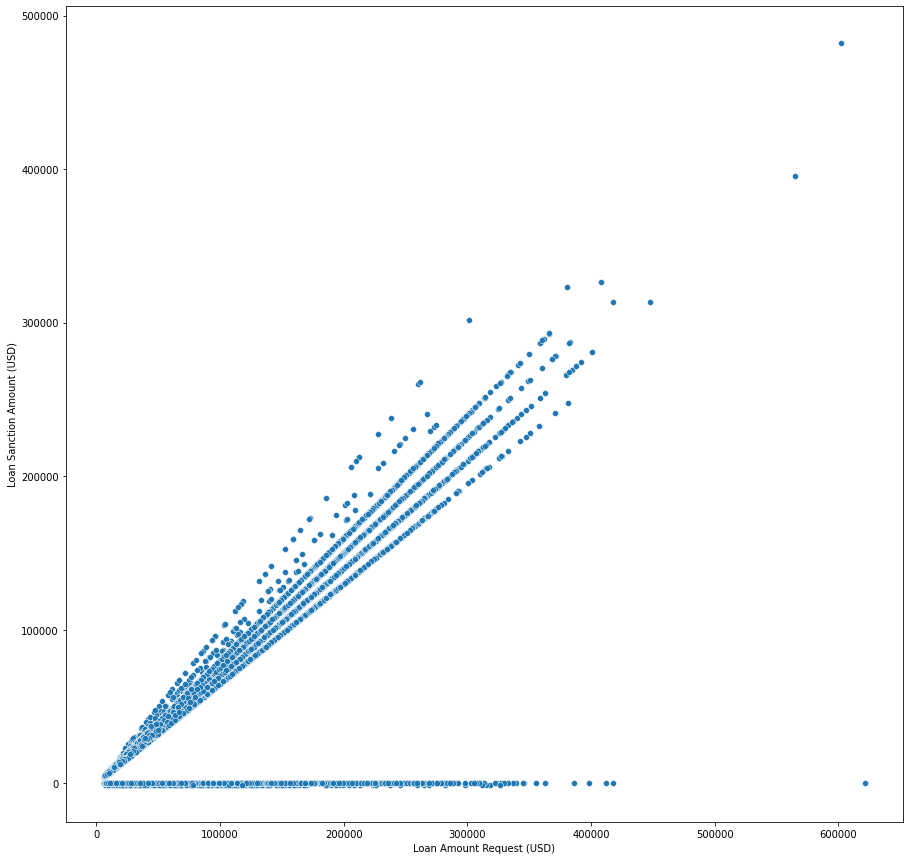

In the above plot, I could see atleast 5 distinct trend lines instead of a general linear relationship. After noticing these trends, I added an additional column in the training data set locally on my laptop. This column was **(Loan Sanction Amount / Loan Amount Request)*100**. Simply put, I wanted to examine the loan amounts sanctioned as a percentage of loan amount requested. 


**Loan sanctioned amount as a percentage of Loan amount requested**

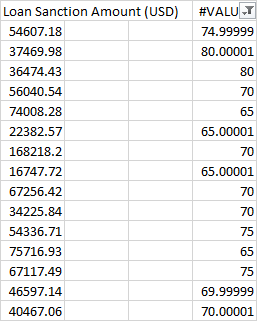

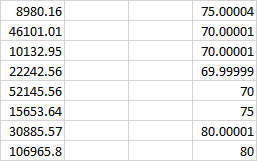

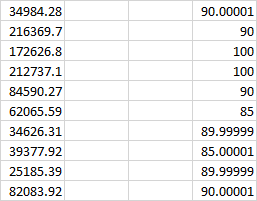

I could see that the loan amounts sanctioned were in distinct clear slabs of **65%, 70%, 75%, 80%, 85%, 90% and 100%**. So the above lines you see in the plot are samples belonging to each of these percentages.  

I felt for such trends in the data, a **tree based regressor** would do a good job of prediction. Hence I finalized on **GradientBoostingRegressor**. A KFold cross validation on the training data set for value of 10 was done. I chose the R2 score metric to evaluate the model which was in alignment with was mentioned in the problem statement as the final evaluation creterion. Even in this process, I noticed the model's **feature importances** and excluded more features which were not contributing to the prediction of the target variable.

The model gave an **average R2 score** of **78.7%** on the training data set. 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse,r2_score as r2
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

# get dummies for categorical columns
dumm = pd.get_dummies(data=df, columns=['Income Stability',
                                        'Location','Expense Type 1','Expense Type 2',
                                        'Has Active Credit Card',
                                        'Property Type','Property Location',
                                        'Co-Applicant'],drop_first=False)

dumm_cor=dumm.copy()

#Storing target variable in y
y=dumm['Loan Sanction Amount (USD)'].copy()

#Dropping columns not found to be contributing to dependent variable
dumm.drop(columns=['Property ID','Age','Profession','Type of Employment',
                   'Gender','Loan Sanction Amount (USD)',
                   'Customer ID','Name',
                   'Income (USD)','Property Age'],inplace=True)

#Storing predictor variables in X
X=dumm.copy()

print("Features in the DataFrame X initially")
print()
print(X.columns)

#Dropping multiple columns that were not found to be contributing to the 
#prediction of target variable.
X.drop(X.iloc[:,11:28],inplace=True,axis=1)

X.drop(columns=['Location_Rural','Location_Semi-Urban'],inplace=True)

#List to store metric for avg
r2avg = []

#Kfold cross validation
kf = KFold(n_splits=10)

model = GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=100,max_depth=5,
                                  min_samples_split=4)
##model = DecisionTreeRegressor(max_depth=7,min_samples_split=4)
#model = AdaBoostRegressor(n_estimators=400,
#                         learning_rate=0.1)

#KFold Cross validation
for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      
      #Fit the data corresponding to training
      model.fit(X_train,y_train)

      #predict using validation set
      pred = model.predict(X_test)

      print("R2 score :",round(r2(y_test,pred),2))
      r2avg.append(round(r2(y_test,pred),2))


print("Avg r2 score:",(sum(r2avg)/len(r2avg)))
print()
print()
print("Final features considered in the model")
print()
print(X.columns)

Features in the DataFrame X initially

Index(['Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Dependents', 'Credit Score', 'No. of Defaults', 'Property Price',
       'Income Stability_High', 'Income Stability_Low', 'Location_Rural',
       'Location_Semi-Urban', 'Location_Urban', 'Expense Type 1_N',
       'Expense Type 1_Y', 'Expense Type 2_N', 'Expense Type 2_Y',
       'Has Active Credit Card_Active', 'Has Active Credit Card_Inactive',
       'Has Active Credit Card_U', 'Has Active Credit Card_Unpossessed',
       'Property Type_1.0', 'Property Type_2.0', 'Property Type_3.0',
       'Property Type_4.0', 'Property Location_Rural',
       'Property Location_Semi-Urban', 'Property Location_U',
       'Property Location_Urban', 'Co-Applicant_0.0', 'Co-Applicant_1.0'],
      dtype='object')
R2 score : 0.76
R2 score : 0.81
R2 score : 0.76
R2 score : 0.76
R2 score : 0.78
R2 score : 0.78
R2 score : 0.78
R2 score : 0.83
R2 score : 0.82
R2 score : 0.79
Avg r2 score: 0.787

**Final prediction on test data**


---

The test data "test.csv" was read into a DataFrame and the all the treatments done for missing values was done as done for the training data. This dataframe was passed to the predict method of the trained model to predict the loan sanction amount and the predicted values were saved to a "final.csv" file which would then be downloaded on to the laptop to be uploaded to the Hackerearth portal for evaluation. 


The model scored **81.22%** on this test data as evaluated by the auto-evalution.

In [ ]:
#Read test data into Pandas DataFrame
test = pd.read_csv("test.csv")

test['Dependents'].replace(np.nan,0,inplace=True)
test['Current Loan Expenses (USD)'].replace(np.nan,0,inplace=True)
test['Property Location'].replace(np.nan,'U',inplace=True)
test['Has Active Credit Card'].replace(np.nan,'U',inplace=True)

#Saving a copy of customer ids to be later added in the submission file
cust = test['Customer ID'].copy()

#Dropping columns for same reasons as training data
test.drop(columns=['Property ID','Age','Customer ID','Name','Type of Employment','Gender',
                'Income (USD)','Property Age'],inplace=True)


#Imputing values for Income Stability
#As per observation from training data file, Income stability is "High" for Pensioners, rest
#all are marked as low

test_highinc = test[(test['Income Stability'].isna()) & (test['Profession']=='Pensioner')].copy()
test_highinc['Income Stability'] ='High'

test_lowinc = test[(test['Income Stability'].isna()) & (test['Profession']!='Pensioner')].copy()
test_lowinc['Income Stability'] = 'Low'

#Update using corresponding indices
test.update(test_highinc)
test.update(test_lowinc)

#Handling credit score
#Mean of credit score among high income stability
mean_inc_hi = test[test['Income Stability']=='High'].copy()
mean_cred_hi = round(mean_inc_hi['Credit Score'].mean(),2)

#Mean of credit score among low income stability
mean_inc_lo = test[test['Income Stability']=='Low'].copy()
mean_cred_lo = round(mean_inc_lo['Credit Score'].mean(),2)

#Imputing values for Credit Score based on Income Stability
test_credhi = test[(test['Income Stability']=='High')& (test['Credit Score'].isna())].copy()
test_credhi['Credit Score'] = mean_cred_hi

test_credlo = test[(test['Income Stability']=='Low') & (test['Credit Score'].isna())].copy()
test_credlo['Credit Score'] = mean_cred_lo

#Updating values of credit scores in missing rows using index
test.update(test_credhi)
test.update(test_credlo)

#Replacing ? in the test file by ''
test['Property Price'].replace('?',0,inplace=True)
test['Property Price'] = pd.to_numeric(test['Property Price'],errors='ignore')

#Imputing values for Property Price based on Property Location.
#Rural
mean_pprice = test[(test['Property Location']=='Rural') & (test['Property Price']!=0)].copy()
mean_pprice_ru = mean_pprice['Property Price'].mean()

#Urban
mean_pprice = test[(test['Property Location']=='Urban') & (test['Property Price']!=0)].copy()
mean_pprice_ur = mean_pprice['Property Price'].mean()

#Semi-Urban
mean_pprice = test[(test['Property Location']=='Semi-Urban') & (test['Property Price']!=0)].copy()
mean_pprice_sem = mean_pprice['Property Price'].mean()

#Fetching rows where Property Price = 0 for Rural,Urban and Semi Urban
test_pprice = test[(test['Property Price']==0) & (test['Property Location']=='Rural')].copy()
test_pprice['Property Price'] = mean_pprice_ru
test.update(test_pprice)

test_pprice = test[(test['Property Price']==0) & (test['Property Location']=='Urban')].copy()
test_pprice['Property Price'] = mean_pprice_ur
test.update(test_pprice)

test_pprice = test[(test['Property Price']==0) & (test['Property Location']=='Semi-Urban')].copy()
test_pprice['Property Price'] = mean_pprice_sem
test.update(test_pprice)

#Drop profession after Imputating values for Income Stability in the earlier step
test.drop(columns=['Profession'],inplace=True)

#Getting rid of "?" symbol from Co-applicant column
test['Co-Applicant'].replace(to_replace='?',value='0',inplace=True)


# get dummies for categorical columns
test = pd.get_dummies(data=test, columns=['Income Stability',
                                        'Location','Expense Type 1','Expense Type 2',
                                        'Has Active Credit Card',
                                        'Property Type','Property Location','Co-Applicant'],
                                         drop_first=False)

#Dropping multiple columns that were not found to be contributing to the 
#prediction of target variable.
test.drop(test.iloc[:,11:28],inplace=True,axis=1)
test.drop(columns=['Location_Rural','Location_Semi-Urban'],inplace=True)
#Predict on test data
fin_pred = model.predict(test)

#Storing predicted values in a final dataframe to be saved as a csv file for evaluation
final = pd.DataFrame(columns=['Customer ID','Loan Sanction Amount (USD)'])
final['Customer ID'] = cust.copy()
final['Loan Sanction Amount (USD)'] = fin_pred
final['Loan Sanction Amount (USD)'] = final['Loan Sanction Amount (USD)'].apply(lambda x : 
                                                                                round(x,2))

#Any negative predictions to be set at 0
negval = final[final['Loan Sanction Amount (USD)']<0].copy()
negval['Loan Sanction Amount (USD)'] = 0
final.update(negval)

#Save predicted values to final.csv
final.to_csv("final.csv",index=False)

print("Saved predictions to final.csv")

Saved predictions to final.csv
